# Exercise 10 : Reflection around a line in plane
* Given a 2D point given by its homogeneous coordinates P̃ = ( x̃; ỹ; 1) . Compute the coordinates of the point P̃ 0 which is obtained by a reflexion of P̃ around an axis inclined by π/6 with the x-axis.
* Same exercise with an axis inclined by π/4 with the x-axis

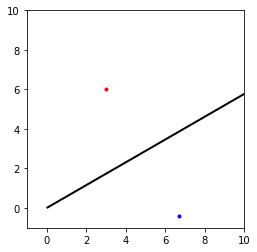

In [42]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

class Figure(object):
    def __init__(self):
        _, self.ax = plt.subplots()

    def draw(self):
        self.ax.axis((-1, 10, -1, 10))
        self.ax.set_aspect(1)
        plt.show()
        
    def draw_polygon(self, points):
        polygon = Polygon(points, True, linewidth=2, edgecolor='#000000', facecolor='#FFFFFF')
        self.ax.add_patch(polygon)
    
    def draw_point(self, p, color='red'):
        self.ax.plot(p[0], p[1], marker='o', markersize=3, color=color)

def mat_mul(m1, m2):
    return np.transpose(np.matmul(
        np.transpose(m1),
        np.transpose(m2),
    ))

def hom2aff(coord):
    return [
        coord[0][0] / coord[2][0],
        coord[1][0] / coord[2][0],
    ]

fig = Figure()

P = [[3], [6], [1]]

fig.draw_point(hom2aff(P))

# rotate axis
A = [[0], [0], [1]]
B = [[20], [0], [1]]

rotation = math.pi / 6
rotation_matrix = [
    [math.cos(rotation), -math.sin(rotation), 0],
    [math.sin(rotation), math.cos(rotation), 0],
    [0, 0, 1],
]

B = mat_mul(B, rotation_matrix)

fig.draw_polygon((hom2aff(A), hom2aff(B)))



# rotate point
rotation = math.pi / 6
rotation_matrix1 = [
    [math.cos(rotation), -math.sin(rotation), 0],
    [math.sin(rotation), math.cos(rotation), 0],
    [0, 0, 1],
]

reflection_matrix = [
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1],
]

rotation = math.pi / -6
rotation_matrix2 = [
    [math.cos(rotation), -math.sin(rotation), 0],
    [math.sin(rotation), math.cos(rotation), 0],
    [0, 0, 1],
]


mat = mat_mul(rotation_matrix2, reflection_matrix)
mat = mat_mul(mat, rotation_matrix1)
P2 = mat_mul(P, mat)

fig.draw_point(hom2aff(P2), 'blue')

fig.draw()
